# Feature Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
DATA_PATH = '../../data/raw/'
train_df = pd.read_csv(DATA_PATH + 'train.csv')
test_df = pd.read_csv(DATA_PATH + 'test.csv')

train_df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [4]:
TARGET = 'exam_score'
ID_COL = 'id'

features = [col for col in train_df.columns if col not in [TARGET, ID_COL]]

numerical_features = train_df[features].select_dtypes(include=np.number).columns.tolist()
categorical_features = train_df[features].select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Numerical features: {len(numerical_features)}')
print(f'Categorical features: {len(categorical_features)}')

Numerical features: 4
Categorical features: 7


## 1. Feature Distributions

### Numerical Features

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'study_hours'}>],
       [<Axes: title={'center': 'class_attendance'}>,
        <Axes: title={'center': 'sleep_hours'}>]], dtype=object)

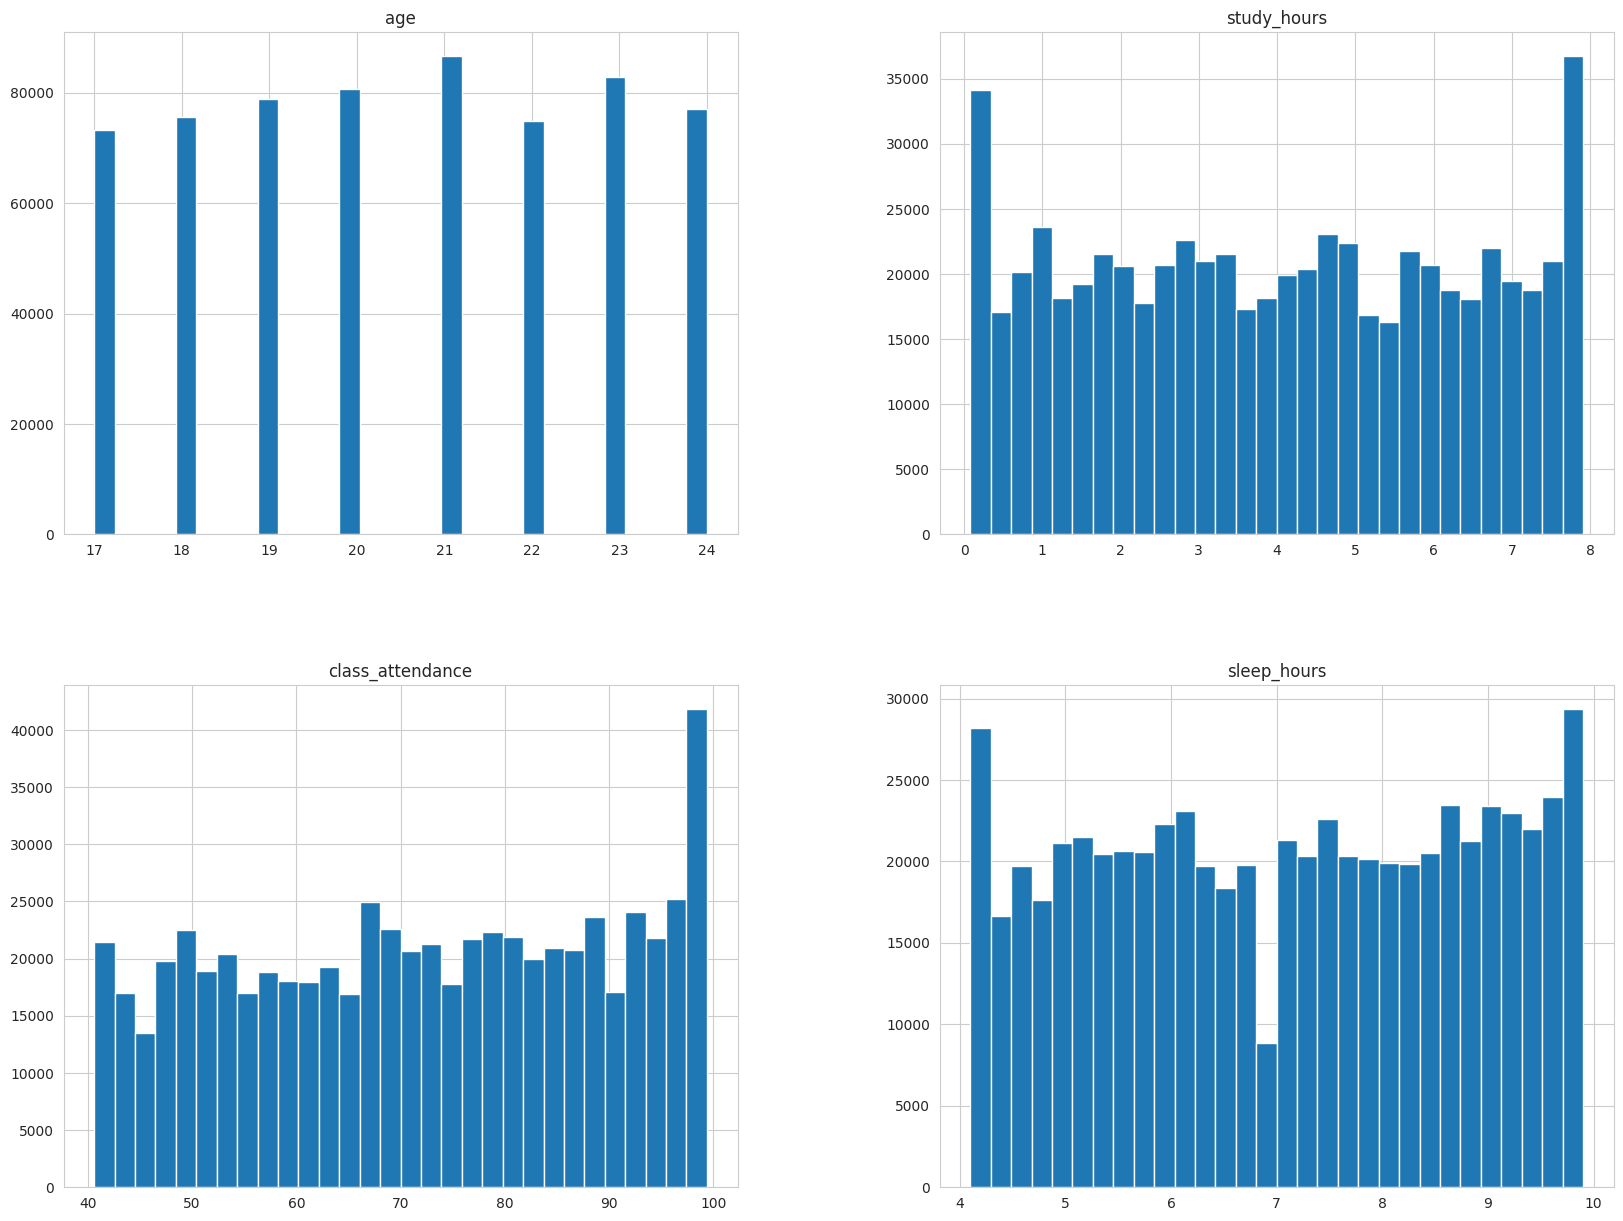

In [5]:
train_df[numerical_features].hist(bins=30, figsize=(20, 15))

### Categorical Features

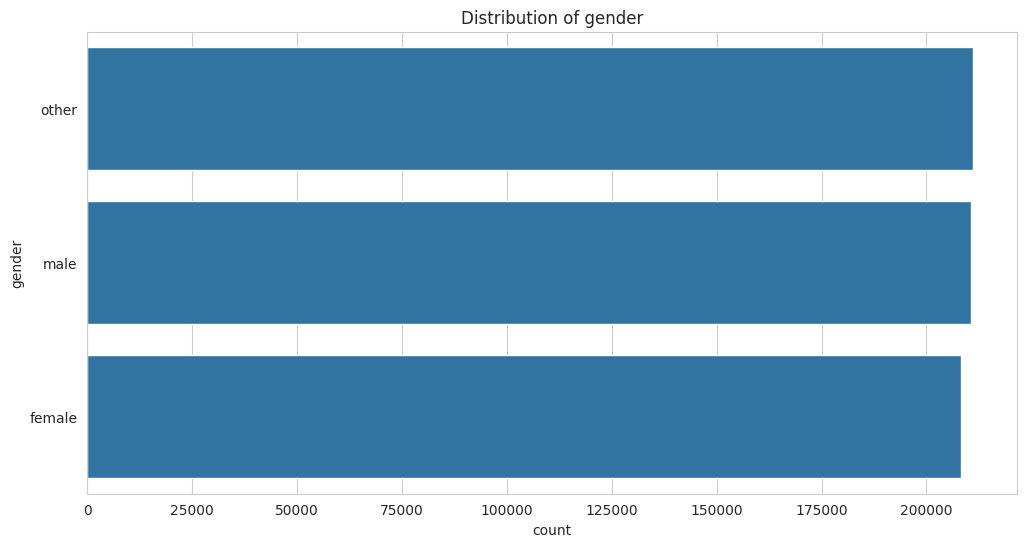

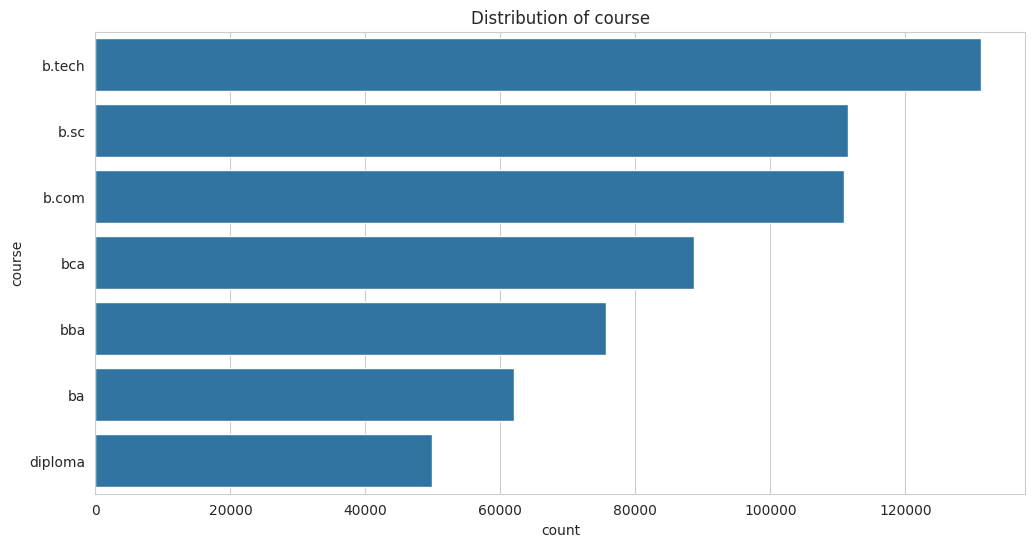

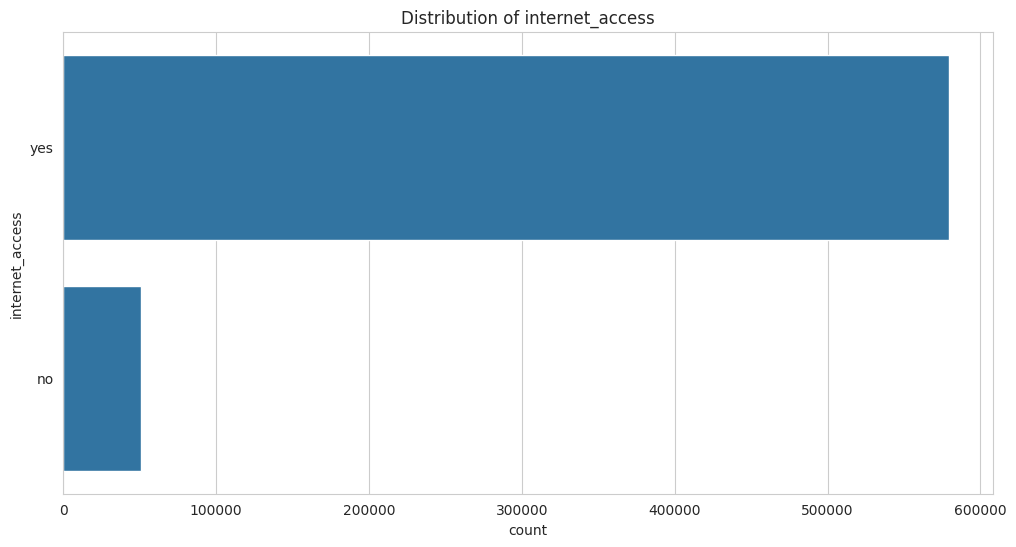

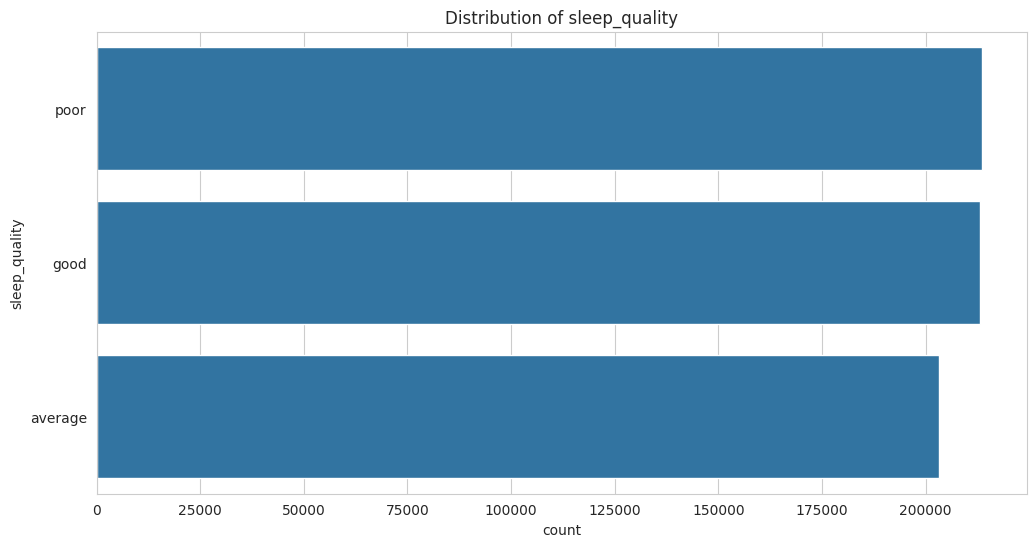

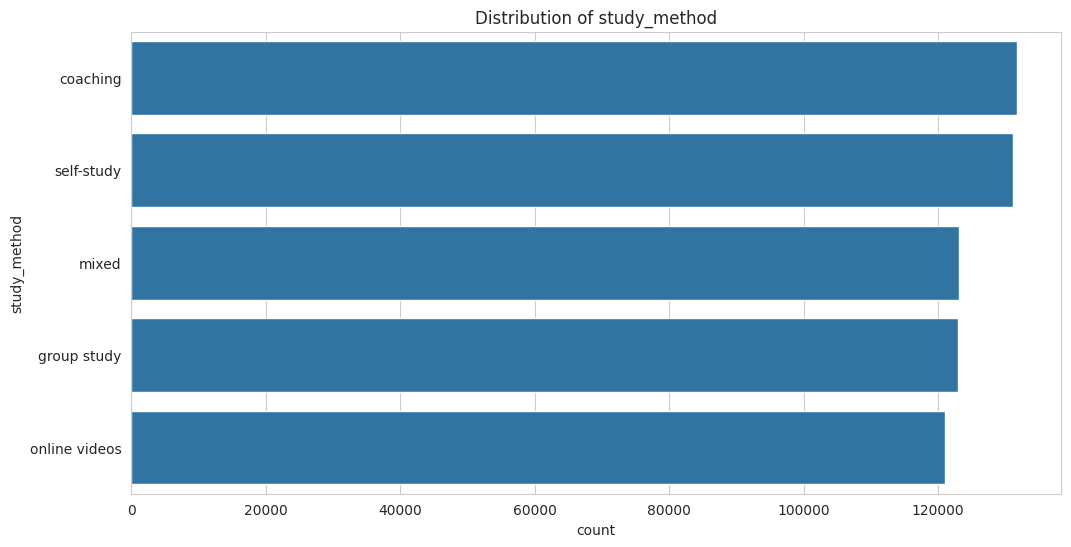

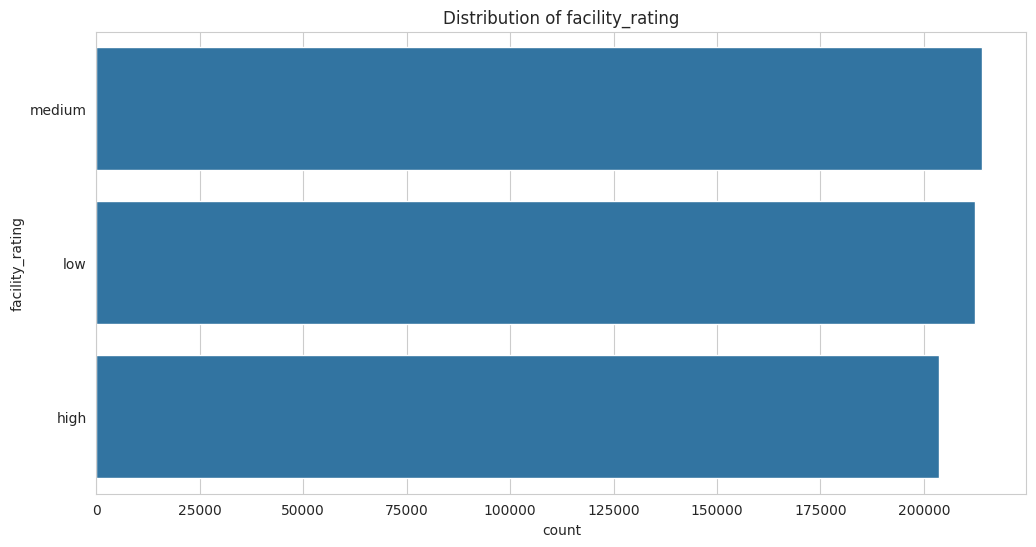

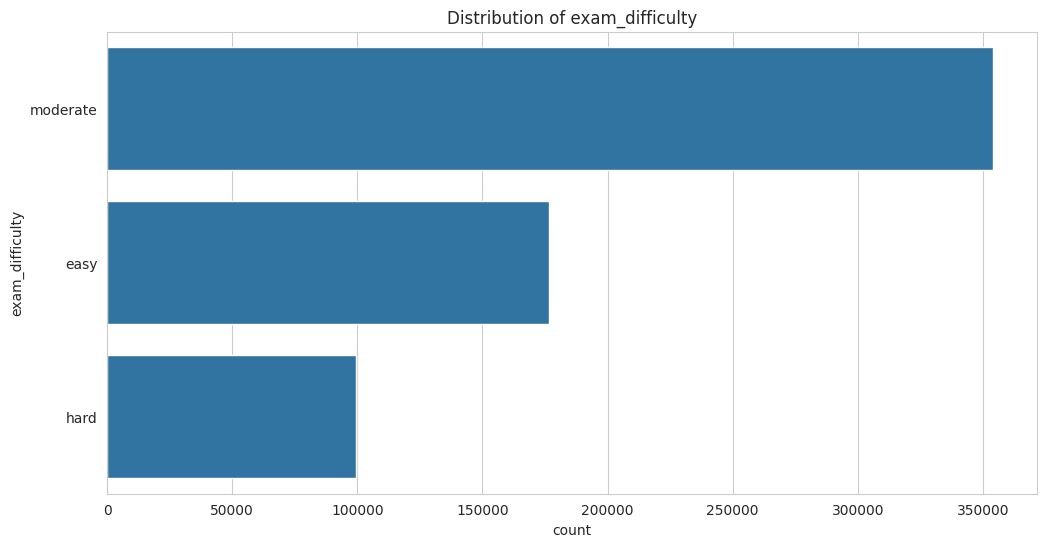

In [6]:
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=col, data=train_df, order=train_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

## 2. Relationship with Target

### Numerical Features vs. Target

<Figure size 1200x600 with 0 Axes>

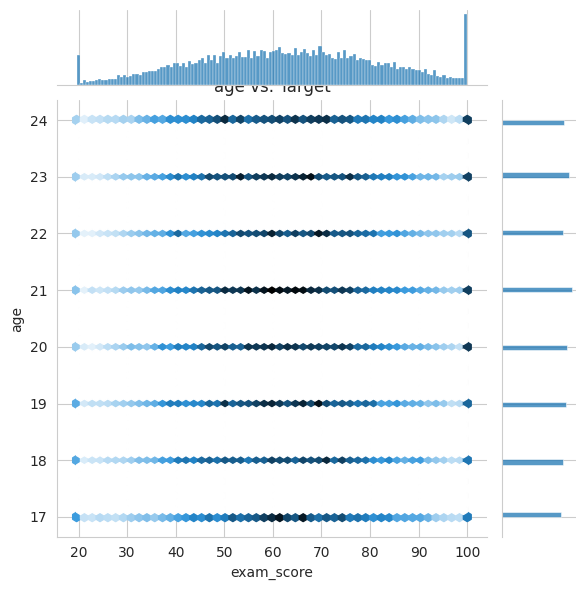

<Figure size 1200x600 with 0 Axes>

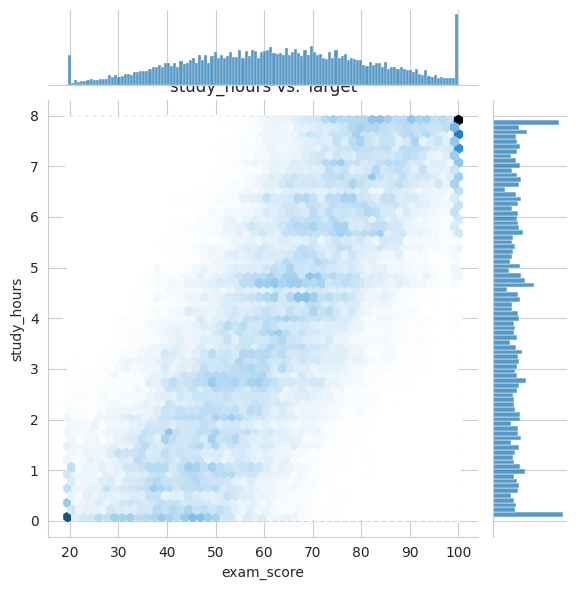

<Figure size 1200x600 with 0 Axes>

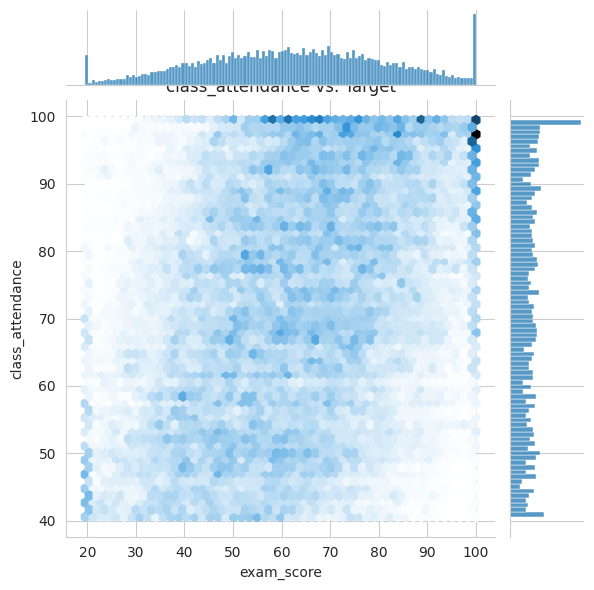

<Figure size 1200x600 with 0 Axes>

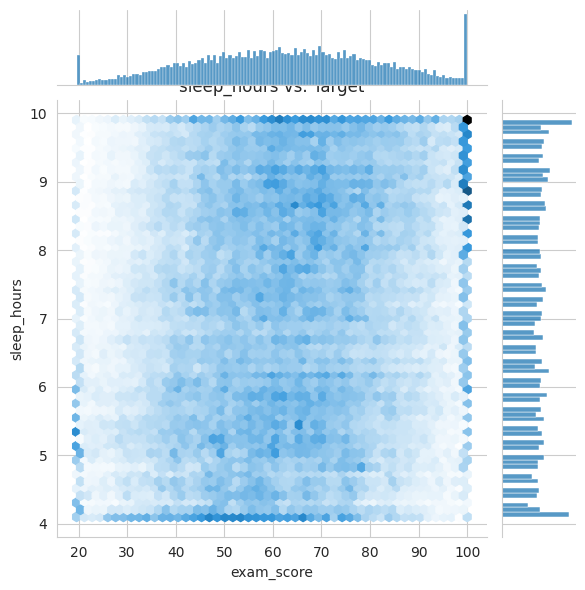

In [7]:
for col in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.jointplot(x=TARGET, y=col, data=train_df,kind="hex")
    plt.title(f'{col} vs. Target')
    plt.show()

### Categorical Features vs. Target

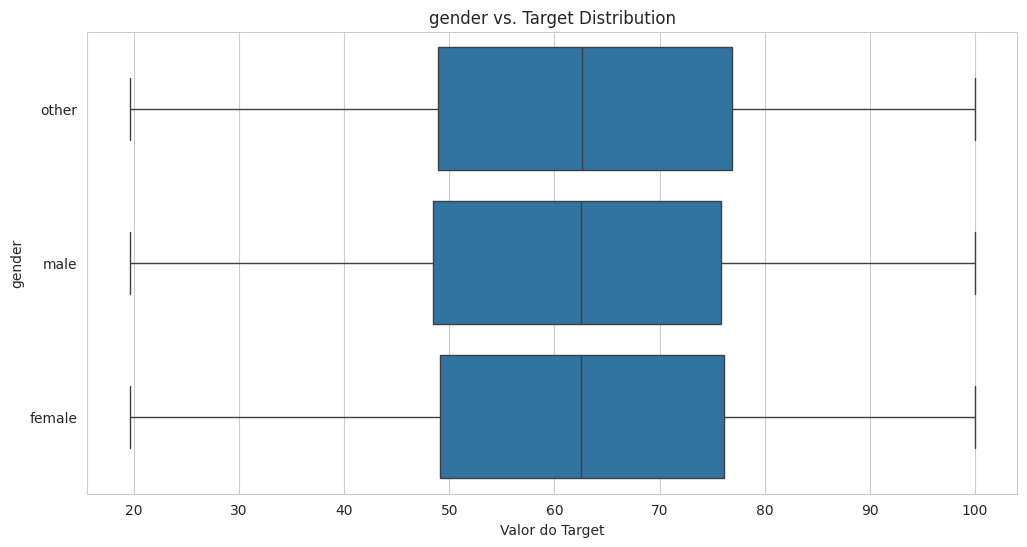

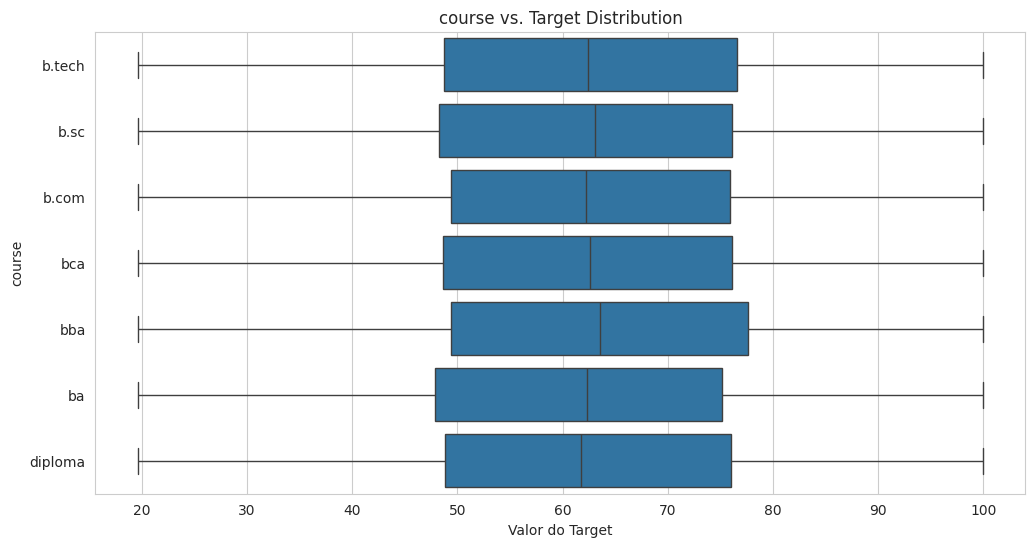

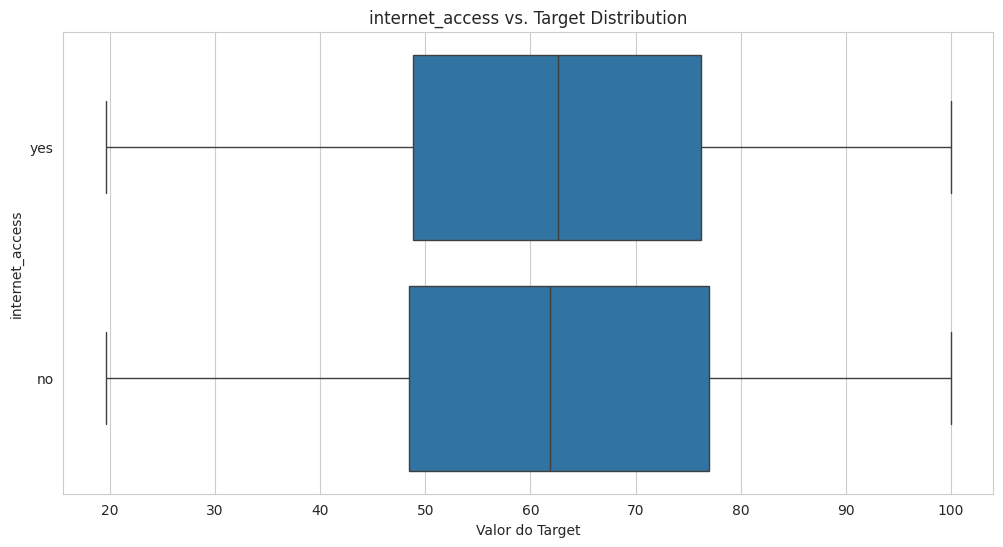

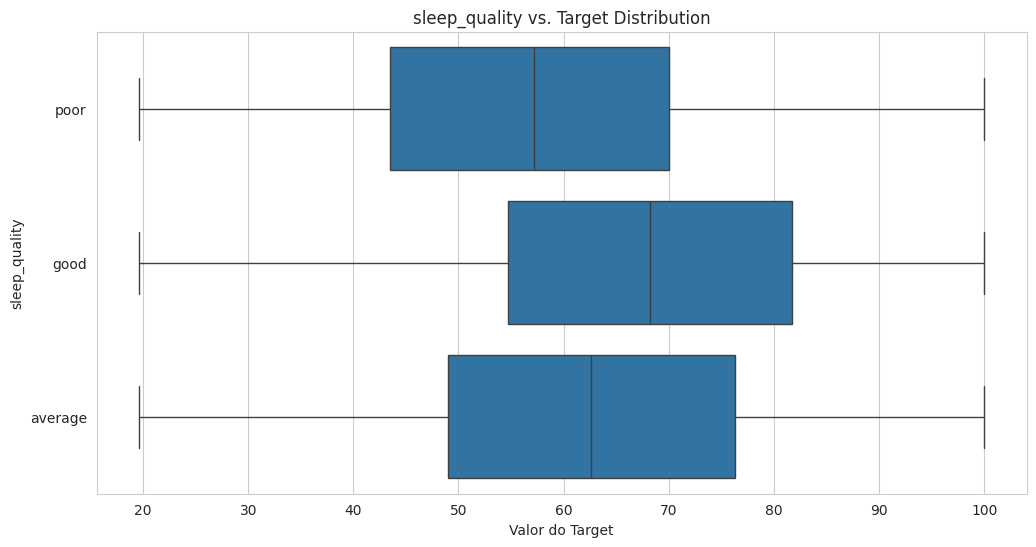

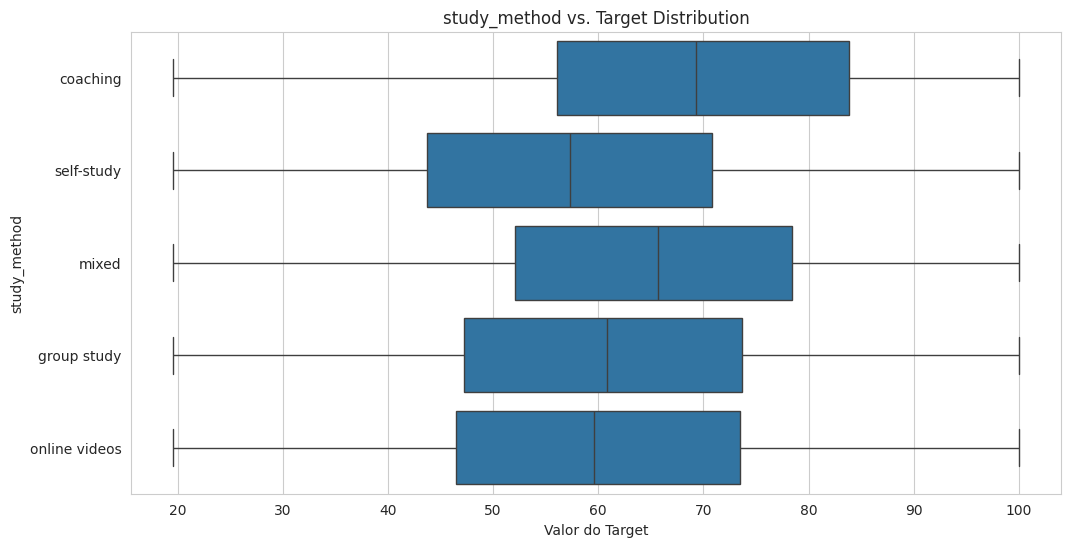

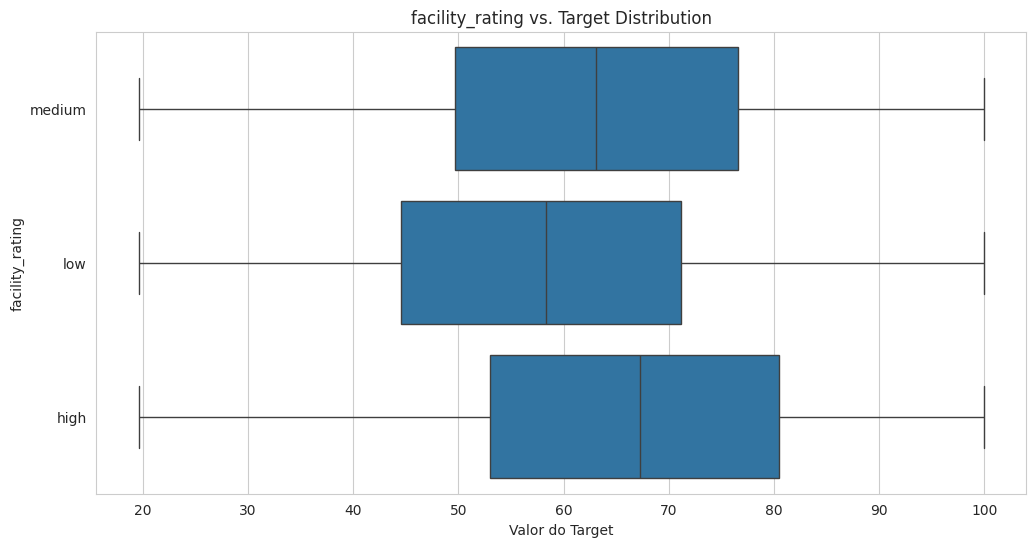

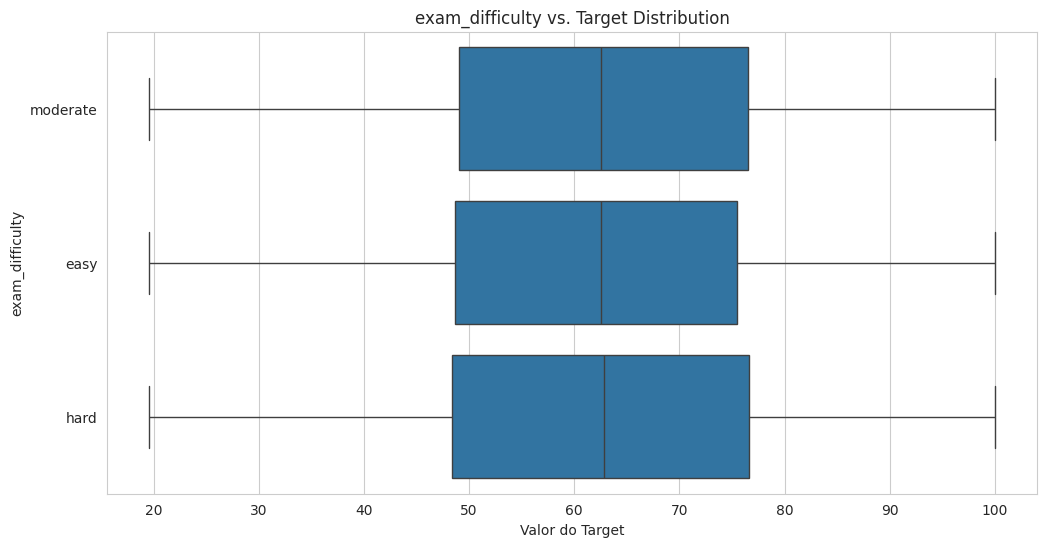

In [8]:
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(y=col, x=TARGET, data=train_df, order=train_df[col].value_counts().index)
    
    plt.title(f'{col} vs. Target Distribution')
    plt.xlabel('Valor do Target')
    plt.ylabel(col)
    plt.show()

## 3. Inter-feature Correlations

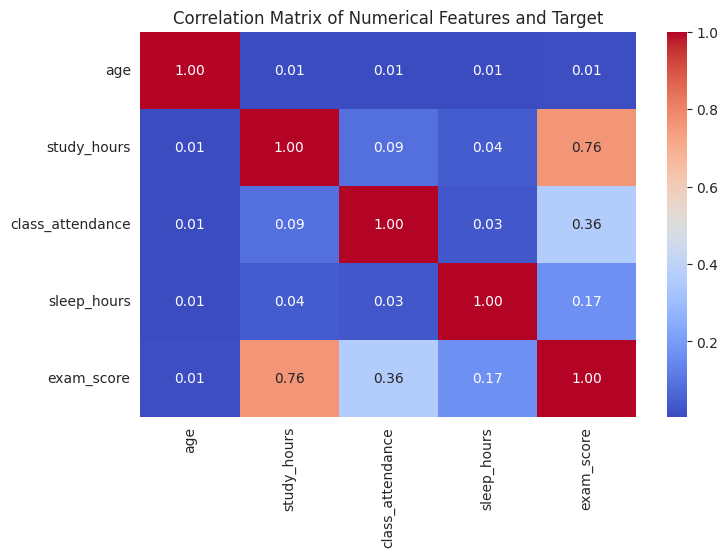

In [9]:
# For correlation, we need to encode the target variable
df_corr = train_df.copy()
df_corr[TARGET] = df_corr[TARGET].astype('category').cat.codes
corr_features = numerical_features + [TARGET]

corr_matrix = df_corr[corr_features].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features and Target')
plt.show()